# Домашнее задание 3

Это домашнее задание по материалам второго семинаров. Дедлайн по отправке - 23:55 24 февраля. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_3

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Вновь рассмотрим задачу минимизации эмпирического риска:
\begin{equation}
\min_{w \in \mathbb{R}^d} \frac{1}{n} \sum\limits_{i=1}^n l (g(w, x_i), y_i).
\end{equation}

В прошлом задании работа шла с линейной модель $g(w, x) = w^T x$ и квадратичную функцию потерь $l(z, y) = (z-y)^2$. 

__(а)__ В дополнение к квадратичной функции потерь реализуйте логистическую/сигмоидную: $l(z,y) = \ln (1 + \exp(-yz))$ (__Важно: $y$ должен принимать значения $-1$ или $1$__). Выпишите градиент. Является ли новая задача регресии выпуклой? Оцените $L$ для новой функции потерь. 

#### Решение:
$\frac{1}{n} \sum\limits_{i=1}^n l (g(w, x_i), y_i) = \frac{1}{n} \sum\limits_{i=1}^n l (w^Tx_i, y_i) = \frac{1}{n} \sum\limits_{i=1}^n ln(1 + exp(-w^Tx_iy_i) \\ $
Найдем градиент и гессиан:

$\nabla f = - \sum\limits_{i=1}^n  \frac{x_iy_i(exp(-w^Tx_iy_i))}{n \cdot (1 + exp(-w^Tx_iy_i))} \\ $
$\nabla ^2 f = - \nabla \sum\limits_{i=1}^n  (\frac{x_iy_i}{n} - \frac{x_iy_i}{n \cdot (1 + exp(-w^Tx_iy_i))}) = 
 \sum\limits_{i=1}^n \frac{x_ix^T_i \cdot exp(-w^Tx_iy_i)}{n(1 + exp(-w^Tx_iy_i))^2} \\ $.
 Аналогично предыдущему дз, здесь матрица получится положительно полуопределенной вследствие перемножения $x_ix_i^T$, поэтому задача будет выпуклой. $ \\ $
  Оценим L. Вспомним, что данная константа равна наибольшему собственному значению матрицы $A = \sum\limits_{i=1}^n \frac{x_ix^T_i \cdot exp(-w^Tx_iy_i)}{n(1 + exp(-w^Tx_iy_i))} = \sum\limits_{i=1}^n \frac{x_ix^T_i} {n(1 + exp(-w^Tx_iy_i))(1 + \frac{1}{exp(-w^Tx_iy_i)})} \leq \frac{1}{2n}\sum\limits_{i=1}^n x_ix^T_i \Longrightarrow L = $ наибольшему собственному значению $ \frac{1}{2n}\sum\limits_{i=1}^n x_ix^T_i$

__(б)__ Возьмите датасет _mushrooms_ из прошлого задания. Проделайте следующие шаги из прошлого задания, только с логистической функцией потерь:

1) Разделите данные на две части: обучающую и тестовую.

2) Для обучающей части $X_{train}$, $y_{train}$ оцените константу $L$ задачи обучения/оптимизации.

3) Используя градиентный спуск, обучите новую модель (без ограничений и регуляризаций). Постройте график: точность от номера итерации.

4) Если в пункте 3) пришлось столкнуться с проблемами или просто необходимо улучшить точность, то добавьте ограничения или $\ell_2$-регуляризацию, как в прошлом ДЗ.

5) Сравните с результатами квадратичной функции потерь из прошлого ДЗ.

In [1]:
from math import log, exp
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import ticker
from sklearn.datasets import load_svmlight_file
import numpy as np
from sklearn.linear_model import LinearRegression
import time 


In [2]:
dataset = "mushrooms.txt" 

data = load_svmlight_file(dataset)
X_all, y_all = data[0].toarray(), data[1]
n_all, d_all = X_all.shape
#print(y)
for i in range (len(y_all)):
    if (y_all[i] == 2):
        y_all[i] = -1
#print(y)



In [3]:


X, X_test, y, y_test = train_test_split(X_all, y_all, train_size=0.8, random_state=42)

#####
n, d = X.shape

#####
L = np.linalg.eigvals(1/(2*n)*X.T.dot(X))[0]
x_0 = np.linalg.pinv(X) @ y

#def f(omega):
#    summa  = 0
#    for i in range(n):
#        summa += log(1+exp(-omega.dot(X[i]*y[i])))
#    return 1/n*summa
#print (f(x_0))


#####
def gradient(omega):
    summa  = 0
    for i in range(n):
        expon = exp(-omega.T.dot(X[i]*y[i]))
        summa += X[i]*expon/(1+expon)*y[i]
    return -1/n*summa
start = np.zeros(d)

def gradient_descent2(start, learn_rate, n_iter, tolerance):
    values_x = []
    values_y = []
    vector = start
    grad = gradient(vector)
    for i in range(n_iter):
        diff = -learn_rate * grad
        vector = vector + diff
        grad = gradient(vector)
        if (i % 100 == 0):
            values_y.append(float((grad.T).dot(grad)))
            values_x.append(i)
    return vector, values_x, values_y
vector, values_x, values_y = gradient_descent2(start, 1/L,3501,1e-7)



/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_14599/2802493963.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  expon = exp(-omega.T.dot(X[i]*y[i]))


/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_14599/2648924542.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


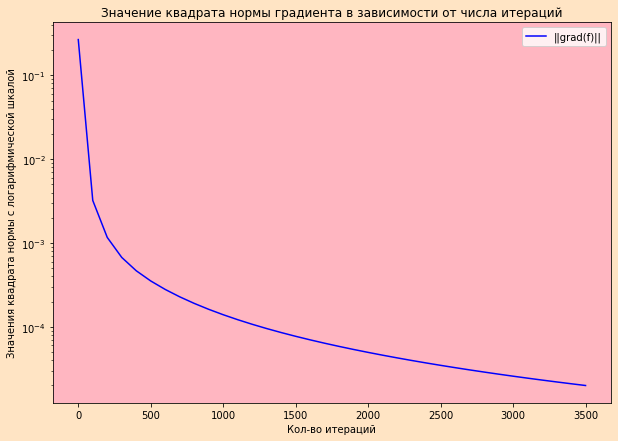

Значение квадрата нормы градиента в итоговой точке:  1.9994535883979195e-05


/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_14599/2802493963.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  expon = exp(-omega.T.dot(X[i]*y[i]))


In [4]:


plt.figure(figsize=(10,7), facecolor = "bisque") 
plt.plot(values_x, values_y, 'b')
plt.legend(['||grad(f)||'])
ax = plt.axes()
ax.set_facecolor("lightpink")
plt.semilogy()
#plt.loglog(values_x,values_y)
#plt.fill_between(values_x, values_y, color = 'bisque')
plt.xlabel("Кол-во итераций")
plt.ylabel("Значения квадрата нормы с логарифмической шкалой")
plt.title('Значение квадрата нормы градиента в зависимости от числа итераций')
plt.show()

print('Значение квадрата нормы градиента в итоговой точке: ', (gradient(vector).T).dot(gradient(vector)))

In [5]:
#print(vector)

#### Найдем процент верных ответов на нашей тестовой выборке:


In [6]:
y_pract = X_test.dot(vector)
model = LinearRegression()

#model.fit(X_train, y_train)
#print(model.coef_, model.intercept_)

schett = 0
for j in range(len(y_test)):
    aaa = (y_test[j])*((vector.dot(X_test[j])))
    if (aaa) < 0:
        #print(aaa, y_test[j], y_pract[j])
        schett += 1
        
print("Количество ошибок = ", schett)
print("Процент верных ответов =  {:%}".format((len(y_pract) - schett)/(len(y_pract))))


Количество ошибок =  1
Процент верных ответов =  99.938462%


#### ВЫВОД: 
По результатам работы программы хочется отметить очень большое время работы, однако точность повысилась

## Задача 2

__(a)__ Реализуйте метод тяжелого шарика. 

In [7]:
def heavyball(start, moment, learn_rate, n_iter):
    values_x = []
    values_y = []
    vector = start
    diff = 0
    grad = gradient(vector)
    for i in range(n_iter):
        diff = -learn_rate * grad + moment * (diff)
        vector = vector + diff
        grad = gradient(vector)
        if (i % 100 == 0):
            values_y.append(float((grad.T).dot(grad)))
            values_x.append(i)
    return vector, values_x, values_y

vector, values_x, values_y = heavyball(start, 0.99, 1/L,2501)


/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_14599/2802493963.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  expon = exp(-omega.T.dot(X[i]*y[i]))


/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_14599/154422301.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


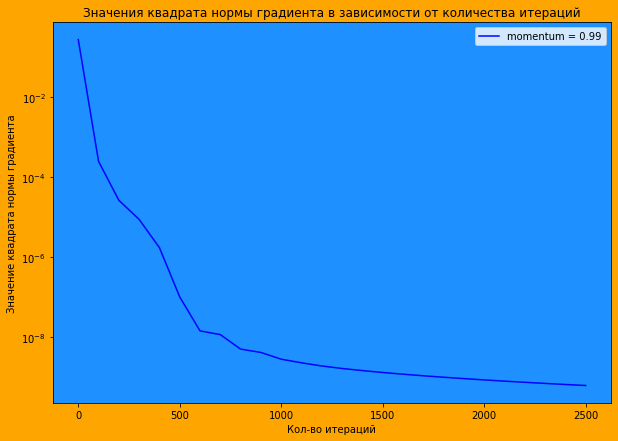

In [8]:
plt.figure(figsize=(10,7), facecolor = "orange") 
plt.plot(values_x, values_y, 'b')
plt.legend(['momentum = 0.99'])
ax = plt.axes()
ax.set_facecolor("dodgerblue")
plt.semilogy()
#plt.loglog(values_x,values_y)
#plt.fill_between(values_x, values_y, color = 'bisque')
plt.xlabel("Кол-во итераций")
plt.ylabel("Значение квадрата нормы градиента")
plt.title('Значения квадрата нормы градиента в зависимости от количества итераций')
plt.show()

__(б)__ Решите задачу логистической регрессии с помощью метода тяжелого шарика (не забудьте разделить выборку на две части: обучающую и тестовую). Зафиксируйте шаг $\frac{1}{L}$ и перебирайте разные значения моментума от -1 до 1. Постройте график сходимости метода от числа итераций (критерий сходимости подберите самостоятельно) для различных значений моментума. Всегда ли сходимость является монотонной?

In [9]:
vector1 = vector
values_y1 = values_y
vector2, values_x, values_y2 = heavyball(start, 0.5, 1/L,1001)
vector3, _, values_y3 = heavyball(start, -0.5, 1/L,1001)
vector4, _, values_y4 = heavyball(start, -0.99, 1/L,1001)


/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_14599/2802493963.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  expon = exp(-omega.T.dot(X[i]*y[i]))


/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_14599/664348475.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


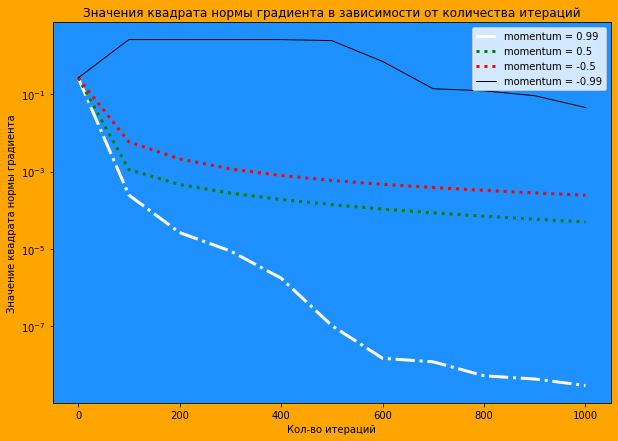

In [10]:
plt.figure(figsize=(10,7), facecolor = "orange") 
line1, = plt.plot(values_x, values_y1[:11], linestyle = '-.', linewidth =3, color = 'w')
line2, = plt.plot(values_x, values_y2, linestyle = ':', linewidth = 3, color = 'g')
line3, = plt.plot(values_x, values_y3, linestyle = ':', linewidth = 3, color = 'r')
line4, = plt.plot(values_x, values_y4, linestyle = '-', linewidth = 1, color = 'k')
plt.legend((line1, line2, line3, line4), ['momentum = 0.99', 'momentum = 0.5', 'momentum = -0.5', 'momentum = -0.99'])
ax = plt.axes()
ax.set_facecolor("dodgerblue")
plt.semilogy()
#plt.loglog(values_x,values_y)
#plt.fill_between(values_x, values_y, color = 'bisque')
plt.xlabel("Кол-во итераций")
plt.ylabel("Значение квадрата нормы градиента")
plt.title('Значения квадрата нормы градиента в зависимости от количества итераций')
plt.show()

__(в)__ Для лучшего значения моментума постройте график зависимости точности модели на тестовой выборке от времени работы метода. Добавьте на этот же график сходимость градиентного спуска с шагом $\frac{1}{L}$. Сделайте вывод.

Лучшее значение моментума - 0.99

In [11]:
y_pract = X_test.dot(vector1)
#model.fit(X, y)

schett = 0
for j in range(len(y_test)):
    aaa = (y_test[j])*((vector.dot(X_test[j])))
    if (aaa) < 0:
        #print(aaa, y_test[j], y_pract[j])
        schett += 1
        
print("Количество ошибок = ", schett)
print("Процент верных ответов =  {:%}".format((len(y_test) - schett)/(len(y_test))))

Количество ошибок =  0
Процент верных ответов =  100.000000%


In [12]:
def heavyball_gd_time(start, moment, learn_rate, n_iter):
    values_x = []
    values_y = []
    values_y2 = []
    list_vector = []
    list_vector2 = []
    vector = start
    vector2 = start
    diff = 0
    diff2 = 0
    begin_time = time.time()
    timeprog = []
    grad = gradient(vector)
    grad2 = gradient(vector2)
    for i in range(n_iter):
        diff2 = -learn_rate * grad2
        vector2 = vector2 + diff2
        diff = -learn_rate * grad + moment * (diff)
        vector = vector + diff
        grad = gradient(vector)
        grad2 = gradient(vector2)
        if (i % 100 == 0):
            list_vector.append(vector)
            list_vector2.append(vector2)
            timeprog.append(time.time() - begin_time)
            values_y.append(float((grad.T).dot(grad)))
            values_y2.append(float((grad2.T).dot(grad2)))
            values_x.append(i)
    return list_vector, list_vector2, values_x, values_y, values_y2, timeprog

list_vector, list_vector2, values_x, values_y, values_y2, timeprog = heavyball_gd_time(start, 0.99, 1/L,2501)


/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_14599/2802493963.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  expon = exp(-omega.T.dot(X[i]*y[i]))


/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_14599/4271654542.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


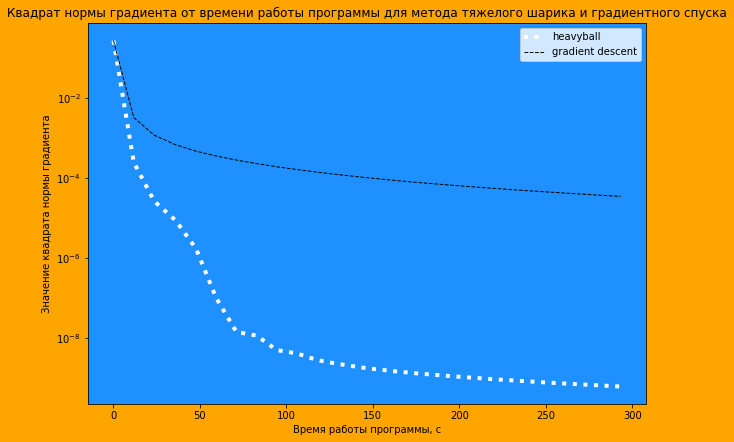

In [13]:
plt.figure(figsize=(10,7), facecolor = "orange") 
line1, = plt.plot(timeprog, values_y, linestyle = ':', linewidth = 4, color = 'w')
line2, = plt.plot(timeprog, values_y2, linestyle = '--', linewidth = 1, color = 'k')
plt.legend((line1, line2), ['heavyball', 'gradient descent'])
ax = plt.axes()
ax.set_facecolor("dodgerblue")
plt.semilogy()
#plt.loglog(values_x,values_y)
#plt.fill_between(values_x, values_y, color = 'bisque')
plt.xlabel("Время работы программы, с")
plt.ylabel("Значение квадрата нормы градиента")
plt.title('Квадрат нормы градиента от времени работы программы для метода тяжелого шарика и градиентного спуска')
plt.show()

In [14]:
def precision(vector):
    y_pract = X_test.dot(vector)
    #model.fit(X, y)
    schett = 0
    for j in range(len(y_test)):
        aaa = (y_test[j])*((vector.dot(X_test[j])))
        if (aaa) < 0:
            #print(aaa, y_test[j], y_pract[j])
            schett += 1
    return (len(y_test) - schett)/(len(y_test))*100

In [15]:
precision_gd_list = []
precision_hb_list = []
for i in range (len(timeprog)):
    precision_hb_list.append(precision(list_vector[i]))
    precision_gd_list.append(precision(list_vector2[i]))
    


/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_14599/610416797.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


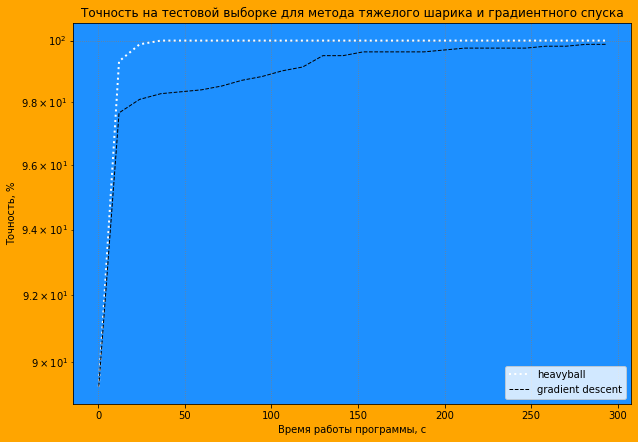

In [16]:
import matplotlib.ticker as ticker
plt.figure(figsize=(10,7), facecolor = "orange") 
line1, = plt.plot(timeprog, precision_hb_list, linestyle = ':', linewidth = 2, color = 'w')
line2, = plt.plot(timeprog, precision_gd_list, linestyle = '--', linewidth = 1, color = 'k')
plt.legend((line1, line2), ['heavyball', 'gradient descent'])
ax = plt.axes()
ax.set_facecolor("dodgerblue")

#formatter = ticker.FormatStrFormatter("{:%}")
#ax.yaxis.set_major_formatter(formatter)
ax.grid(which='major', color = 'gray', linestyle = ':')
plt.semilogy()
#plt.loglog(values_x,values_y)
#plt.fill_between(values_x, values_y, color = 'bisque')
plt.xlabel("Время работы программы, с")
plt.ylabel("Точность, %")
plt.title('Точность на тестовой выборке для метода тяжелого шарика и градиентного спуска')
plt.show()

#### ВЫВОД:
Метод тяжелого шарика работает заметно лучше (требует меньшего количества итераций для выхода на определенную точность), чем метод градиентонго спуска

__(г)__ Если в пунктах (б) и (в) столкнулись с проблемами, попробуйте $\ell_2$-регуляризовать задачу или рассмотреть ее на ограниченном множестве.

__(д)__ Реализуйте ускоренный метод Нестерова (в форме Нестерова, а не который доказывали на семинаре). 

In [17]:
def Nesterov(start, moment, learn_rate, n_iter):
    values_x = []
    values_y = []
    vector = start
    diff = 0
    grad = gradient(vector + moment * (diff))
    for i in range(n_iter):
        diff = -learn_rate * grad + diff * moment
        vector = vector + diff 
        grad = gradient(vector + moment * (diff))
        if (i % 10 == 0):
            gradv = gradient(vector)
            values_y.append(float((gradv.T).dot(gradv)))
            values_x.append(i)
    return vector, values_x, values_y

vector, values_x, values_y = Nesterov(start, 0.99, 1/L,2001)

/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_14599/2802493963.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  expon = exp(-omega.T.dot(X[i]*y[i]))


In [18]:
y_pract = X_test.dot(vector)
schett = 0
for j in range(len(y_test)):
    aaa = (y_test[j])*((vector.dot(X_test[j])))
    if (aaa) < 0:
        #print(aaa, y_test[j], y_pract[j])
        schett += 1
        
print("Количество ошибок = ", schett)
print("Процент верных ответов =  {:%}".format((len(y_test) - schett)/(len(y_test))))

Количество ошибок =  0
Процент верных ответов =  100.000000%


__(е)__ Решите задачу логистической регресии с помощью метода Нестерова (не забудьте разделить выборку на две части: обучающую и тестовую). Зафиксируйте шаг $\frac{1}{L}$ и перебирайте разные значения моментума от -1 до 1. Проверьте также значения моментума равные $\frac{k}{k+3}$, $\frac{k}{k+2}$, $\frac{k}{k+1}$ ($k$ - номер итерации), а если решаете сильно выпуклую задачу, то и $\frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$. Постройте график сходимости метода от числа итераций (критерий сходимости подберите самостоятельно) для различных значений моментума. Всегда ли сходимость является монотонной?

In [19]:
vector1 = vector
values_y1 = values_y

vector2, values_x, values_y2 = Nesterov(start, 0.5, 1/L,1001)
vector3, _, values_y3 = Nesterov(start, -0.5, 1/L,1001)
vector4, _, values_y4 = Nesterov(start, -0.99, 1/L,1001)


/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_14599/2802493963.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  expon = exp(-omega.T.dot(X[i]*y[i]))


/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_14599/1065492186.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


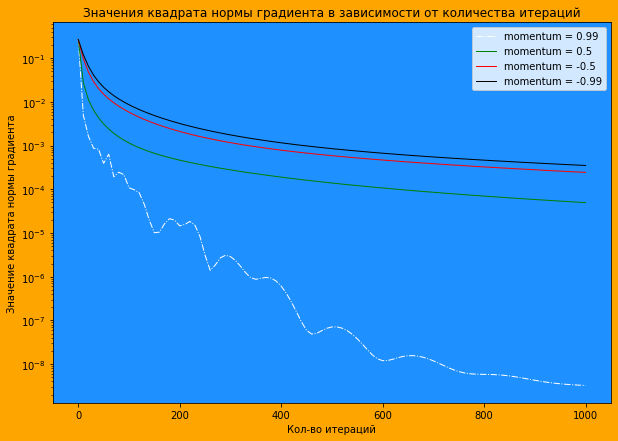

In [20]:
plt.figure(figsize=(10,7), facecolor = "orange") 
line1, = plt.plot(values_x, values_y1[:101], linestyle = '-.', linewidth =1, color = 'w')
line2, = plt.plot(values_x, values_y2, linewidth = 1, color = 'g')
line3, = plt.plot(values_x, values_y3, linewidth = 1, color = 'r')
line4, = plt.plot(values_x, values_y4, linewidth = 1, color = 'k')
plt.legend((line1, line2, line3, line4), ['momentum = 0.99', 'momentum = 0.5', 'momentum = -0.5', 'momentum = -0.99'])
ax = plt.axes()
ax.set_facecolor("dodgerblue")
plt.semilogy()
#plt.loglog(values_x,values_y)
#plt.fill_between(values_x, values_y, color = 'bisque')
plt.xlabel("Кол-во итераций")
plt.ylabel("Значение квадрата нормы градиента")
plt.title('Значения квадрата нормы градиента в зависимости от количества итераций')
plt.show()

#### Из графика видно, что сходимость не всегда будет монотонной.

In [21]:
def Nesterov1(start, const, learn_rate, n_iter):
    values_x = []
    values_y = []
    vector = start
    diff = 0
    grad = gradient(vector)
    for i in range(n_iter):
        diff = -learn_rate * grad + diff * i/(i+const)
        vector = vector + diff
        grad = gradient(vector + i/(i+const) * (diff)) 
        if (i % 100 == 0):
            values_y.append(float((grad.T).dot(grad)))
            values_x.append(i)
    return vector, values_x, values_y

vector1, values_x, values_y1 = Nesterov1(start, 1, 1/L,1001)
vector2, values_x, values_y2 = Nesterov1(start, 2, 1/L,1001)
vector3, values_x, values_y3 = Nesterov1(start, 3, 1/L,1001)



/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_14599/2802493963.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  expon = exp(-omega.T.dot(X[i]*y[i]))


/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_14599/1891670730.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


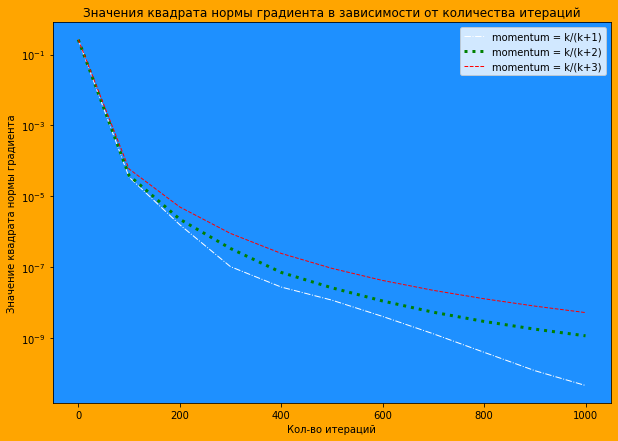

In [22]:
plt.figure(figsize=(10,7), facecolor = "orange") 
line1, = plt.plot(values_x, values_y1, linestyle = '-.', linewidth =1, color = 'w')
line2, = plt.plot(values_x, values_y2, linestyle = ':', linewidth = 3, color = 'g')
line3, = plt.plot(values_x, values_y3, linestyle = '--', linewidth = 1, color = 'r')
plt.legend((line1, line2, line3), ['momentum = k/(k+1)', 'momentum = k/(k+2)', 'momentum = k/(k+3)'])
ax = plt.axes()
ax.set_facecolor("dodgerblue")
plt.semilogy()
#plt.loglog(values_x,values_y)
#plt.fill_between(values_x, values_y, color = 'bisque')
plt.xlabel("Кол-во итераций")
plt.ylabel("Значение квадрата нормы градиента")
plt.title('Значения квадрата нормы градиента в зависимости от количества итераций')
plt.show()

График выглядит по-разному для данных значений моментума, лучше всего сходится метод с моментумом $\frac{k}{k+1}$

__(ж)__ Для лучшего значения моментума постройте график зависимости точности модели на тестовой выборке от времени работы метода. Добавьте этот график к графикам для тяжелого шарика и градиентного спуска из пункта (г). Сделайте итоговый вывод.

In [23]:
def Nesterov2(start, learn_rate, n_iter):
    values_x = []
    values_y = []
    vector_list = []
    vector = start
    diff = 0
    begin_time = time.time()
    timeprogNest = []
    grad = gradient(vector)
    for i in range(n_iter):
        vector_list.append(vector)
        diff = -learn_rate * grad + diff * i/(i+1)
        vector = vector + diff
        grad = gradient(vector + i/(i+1) * (diff)) 
        timeprogNest.append(time.time() - begin_time)
        #if (i % 100 == 0):
         #   
          #  values_y.append(float((gradient(vector).T).dot(gradient(vector))))
           # values_x.append(i)
    return vector_list, timeprogNest

vector_list, timeprogNest = Nesterov2(start, 1/L, 2501)

/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_14599/2802493963.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  expon = exp(-omega.T.dot(X[i]*y[i]))


In [24]:
precision_nest_list = []
for i in range (1, len(timeprogNest)):
    precision_nest_list.append(precision(vector_list[i]))


/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_14599/3589592351.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


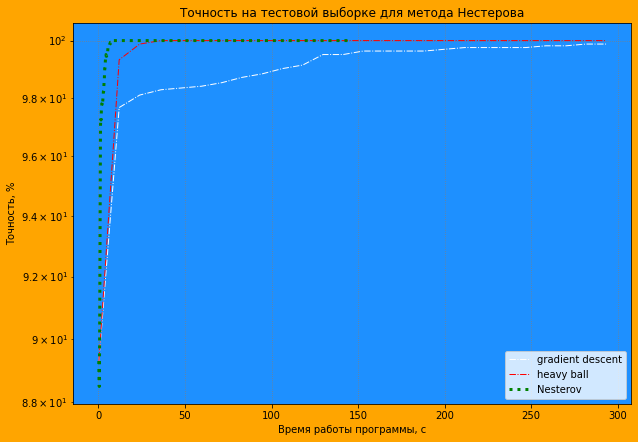

In [25]:
import matplotlib.ticker as ticker
plt.figure(figsize=(10,7), facecolor = "orange") 
line1, = plt.plot(timeprog, precision_gd_list, linestyle = '-.', linewidth = 1, color = 'w')
line2, = plt.plot(timeprog, precision_hb_list, linestyle = '-.', linewidth = 1, color = 'r')
line3, = plt.plot(timeprogNest[1:], precision_nest_list, linestyle = ':', linewidth = 3, color = 'g')
plt.legend((line1, line2, line3), ['gradient descent', 'heavy ball', 'Nesterov'])
ax = plt.axes()
ax.set_facecolor("dodgerblue")
ax.grid(which='major', color = 'gray', linestyle = ':')
plt.semilogy()
#plt.loglog(values_x,values_y)
#plt.fill_between(values_x, values_y, color = 'bisque')
plt.xlabel("Время работы программы, с")
plt.ylabel("Точность, %")
plt.title('Точность на тестовой выборке для метода Нестерова')
plt.show()

#### Общий вывод:
Таким образом, получилось, что точность метода тяжелого шарика лучше метода градиентного спуска. Метод Нестерова оказался еще более эффективным - его точность лучше точности метода тяжелого шарика на ранних этапах работы программы (если рассматривать точность в зависимости от времени). К определенному моменту обе программы выходят на максимальную точность.

__Бонусные пункт__

__(з)__ Сделаем подбор константы $L$ адаптивным. Как упоминалось на семинаре, можно измерять локальную $L$, используя:
$$
f(y) \leq f(x^k) + \langle \nabla f(x^k), y - x^k \rangle + \frac{L}{2}\|x^k - y\|_2^2
$$
В частности, может подойти процедура:

```python
def backtracking_L(f, grad, x, h, L0, rho):
    L = L0
    fx = f(x)
    gradx = grad(x)
    while True:
        y = x - 1 / L * h
        if f(y) <= fx - 1 / L gradx.dot(h) + 1 / (2 * L) h.dot(h):
            break
        else:
            L = L * rho
    return L
```

Каким стоит взять __h__? __rho__ должно быть больше или меньше 1? __L0__ надо брать заведомо большим или маленьким?

In [26]:
#ответ

__(и)__ Поэксперементируйте с этой процедурой, встроенной в подбор $L$ для шага градиентного спуска. В качестве задачи продолжайте рассматривать логистическую регрессию из Задачи 1. Аналогично встройте процедуру подбора $L$ в метод тяжелого шарика и ускоренный метод Нестерова. Постройте график сходимости метода от числа итераций (критерий сходимости подберите самостоятельно). Отобразите на этом графике градиентный спуск, тяжелый шарик и метод Нестерова с адаптивным шагом и шагом $\frac{1}{L}$ (всего 6 линий на графике). Сделайте вывод.

In [27]:
#ответ

__(к)__ Постройте аналогичный пункту (и) график точности модели от времени.

In [28]:
#ответ

__(л)__ В [работе](https://arxiv.org/pdf/1204.3982.pdf) представлена техника рестартов для подавления немонотонной сходимости Алгоритма 2 (метод Нестерова). Попробуйте повторить эксперименты авторов на $\ell_2$-регуляризованной квадратичной или логистической регресии. Возьмите параметр регуляризации $\lambda = L / 100$.

In [29]:
#ответ